In [29]:
# import libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [45]:
# load dataset

df = pd.read_csv('covid_19_clean_complete.csv' , parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18432 entries, 0 to 18431
Data columns (total 8 columns):
Province/State    5616 non-null object
Country/Region    18432 non-null object
Lat               18432 non-null float64
Long              18432 non-null float64
Date              18432 non-null datetime64[ns]
Confirmed         18432 non-null int64
Deaths            18432 non-null int64
Recovered         18432 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.1+ MB


In [47]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,18432.000000,18432.000000,18432.000000,18432.000000,18432.000000
mean,21.772168,23.292823,680.970215,28.959907,189.027615
std,24.497296,70.972235,6227.033398,365.179227,2429.181318
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,7.844875,-16.237775,0.000000,0.000000,0.000000
50%,23.692500,20.972650,0.000000,0.000000,0.000000
75%,41.227200,84.497525,43.000000,0.000000,1.000000
max,71.706900,178.065000,243453.000000,13915.000000,63471.000000


In [48]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [49]:
# only Provinces state has a missing value. 

In [50]:
# Feature Engineering

# 1. replace missing value
df['Province/State'] = df['Province/State'].fillna('missing')

#2.  Active cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


In [51]:
df1 = df[df['Date'] == max(df['Date'])].reset_index()
df1.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,18176,missing,Afghanistan,33.0000,65.0000,2020-04-02,273,6,10,257
1,18177,missing,Albania,41.1533,20.1683,2020-04-02,277,16,76,185
2,18178,missing,Algeria,28.0339,1.6596,2020-04-02,986,86,61,839
3,18179,missing,Andorra,42.5063,1.5218,2020-04-02,428,15,10,403
4,18180,missing,Angola,-11.2027,17.8739,2020-04-02,8,2,1,5


In [53]:
# current Statistics
temp = df1.groupby('Date')['Confirmed' , 'Deaths' , 'Recovered' , 'Active'].sum().reset_index()
temp = temp[temp['Date'] == max(temp['Date'])]
temp['Global Mortality'] = temp['Deaths'] / temp['Confirmed']
temp.style.background_gradient(cmap='RdYlGn')

,Date,Confirmed,Deaths,Recovered,Active,Global Mortality
0,2020-04-02 00:00:00,1013155,52983,208528,751644,0.0522951


In [54]:
temp1 = temp.melt(id_vars='Date' , value_vars=['Confirmed' , 'Deaths' , 'Recovered'])
fig = px.treemap(data_frame=temp1 , names=['Confirmed' , 'Deaths' , 'Recovered'] , path=["variable"], values="value", height=500, width=700)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [55]:
# Globaly
data = df1.groupby('Country/Region')[['Confirmed','Active' , 'Recovered' , 'Deaths']].sum().reset_index()
data.sort_values('Confirmed' , ascending=False , inplace = True)
data.style.background_gradient(cmap = 'Blues' , subset = ['Confirmed' , 'Active']).background_gradient(cmap = 'Greens' , subset = ['Recovered']).background_gradient(cmap = 'Reds' , subset = ['Deaths'])

,Country/Region,Confirmed,Active,Recovered,Deaths
169,US,243453,228526,9001,5926
84,Italy,115242,83049,18278,13915
154,Spain,112065,74974,26743,10348
65,Germany,84794,61247,22440,1107
36,China,82432,2545,76565,3322
61,France,59929,41983,12548,5398
80,Iran,50468,30597,16711,3160
173,United Kingdom,34173,31055,192,2926
159,Switzerland,18827,14278,4013,536
168,Turkey,18135,17364,415,356


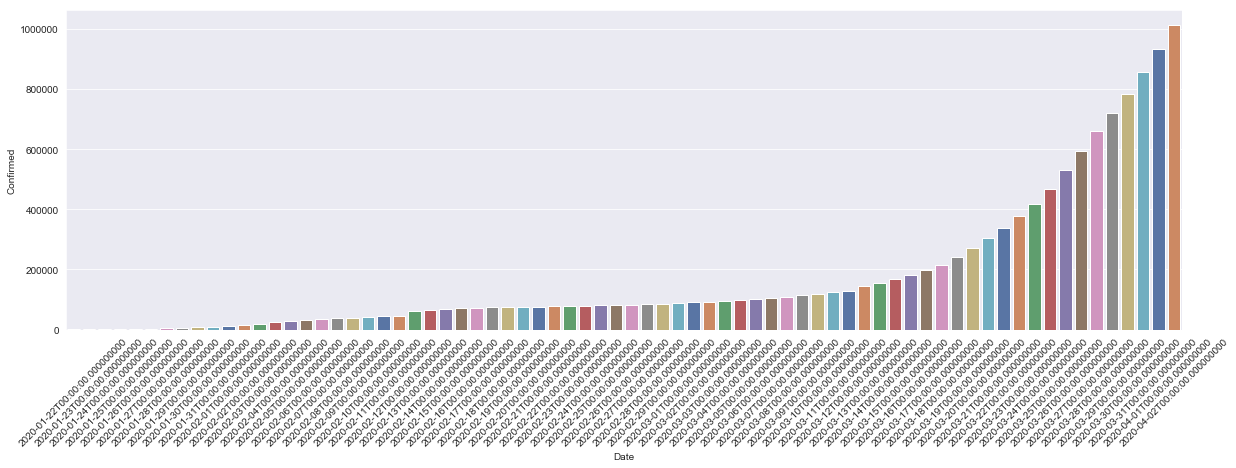

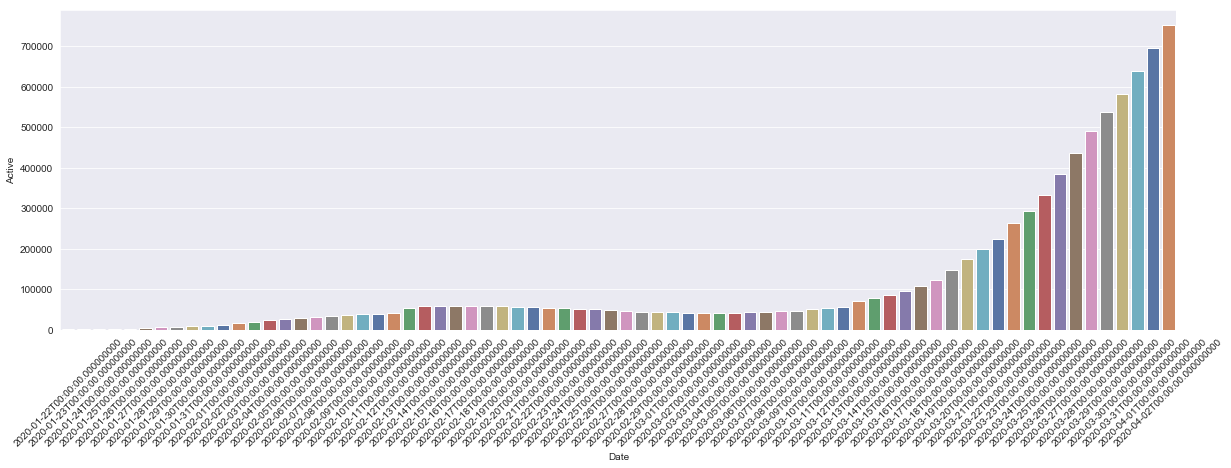

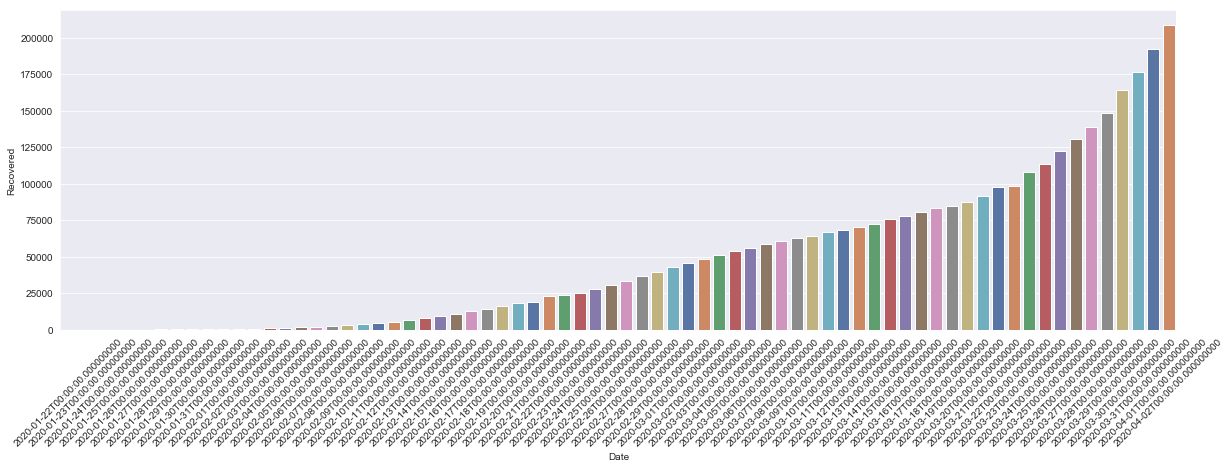

In [56]:
sns.set_style('darkgrid')
data = df.groupby('Date')['Recovered' , 'Confirmed' , 'Active' , 'Deaths'].sum().reset_index()
data
cases = ['Confirmed' , 'Active' , 'Recovered' , 'Deaths']
plotnumber = 1
for i in cases:
    if plotnumber < 4:
        plt.figure(figsize=(20,20))
        ax = plt.subplot(3,1,plotnumber)
        sns.barplot(data = data , x = 'Date' , y = i , palette='deep')
        plt.xticks(rotation=45)
        plt.show()
    plotnumber = plotnumber + 1

In [61]:
df1['mortality_rate'] = round(df1['Deaths'] / df1['Confirmed']*100 , 2)
df1['mortality_rate'].fillna(0 , inplace = True)
df1.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,mortality_rate
0,18176,missing,Afghanistan,33.0000,65.0000,2020-04-02,273,6,10,257,2.20
1,18177,missing,Albania,41.1533,20.1683,2020-04-02,277,16,76,185,5.78
2,18178,missing,Algeria,28.0339,1.6596,2020-04-02,986,86,61,839,8.72
3,18179,missing,Andorra,42.5063,1.5218,2020-04-02,428,15,10,403,3.50
4,18180,missing,Angola,-11.2027,17.8739,2020-04-02,8,2,1,5,25.00


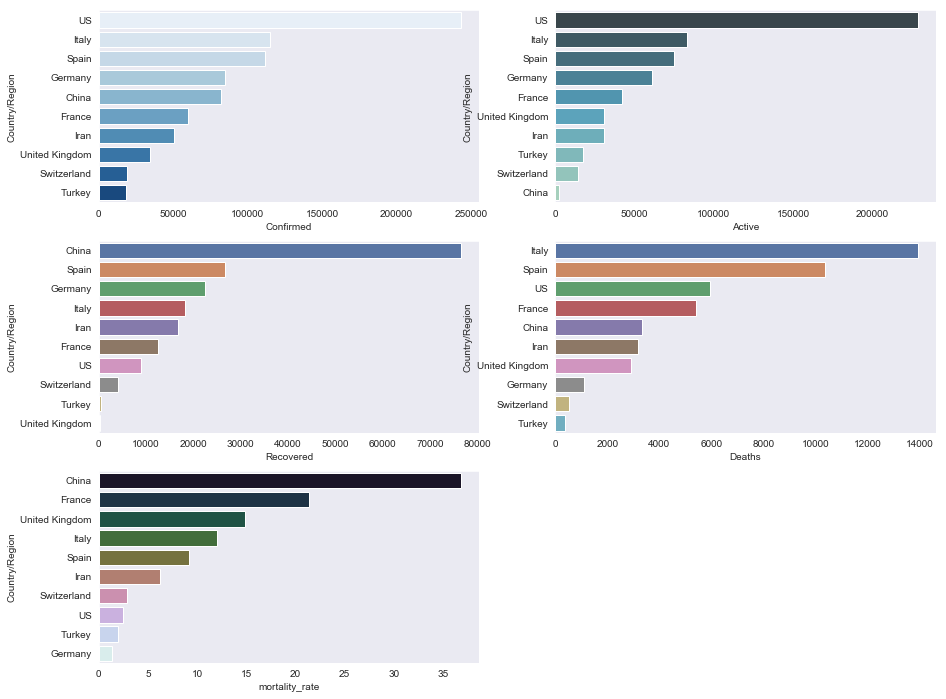

In [62]:
# top 10 Countries based of categories
sns.set_style('dark')
data = df1.groupby('Country/Region')['Confirmed','Active','Recovered','Deaths' , 'mortality_rate'].sum().reset_index()
data
cases = ['Confirmed','Active','Recovered','Deaths']

plt.figure(figsize=(15,12))
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
#cornfirmed

data = data.sort_values('Confirmed', ascending=False).head(10)
sns.barplot(data = data , x = 'Confirmed' , y = 'Country/Region' , palette='Blues' , ax = ax1)

#Active
#plt.figure(figsize=(20,20))
data = data.sort_values('Active', ascending=False).head(10)
sns.barplot(data = data , x = 'Active' , y = 'Country/Region' , palette='GnBu_d' , ax = ax2)

data = data.sort_values('Recovered', ascending=False).head(10)
sns.barplot(data = data , x = 'Recovered' , y = 'Country/Region' , palette='deep' , ax = ax3)

data = data.sort_values('Deaths', ascending=False).head(10)
sns.barplot(data = data , x = 'Deaths' , y = 'Country/Region' , palette='deep' , ax = ax4)

data = data.sort_values('mortality_rate' , ascending=False).head(10)
sns.barplot(data = data , x = 'mortality_rate' , y = 'Country/Region' , palette='cubehelix' , ax = ax5)


In [64]:
# deaths vs confirmed cases per country
data = df1.groupby('Country/Region')['Deaths' , 'Confirmed'].sum().reset_index()
fig = px.scatter(data_frame=data, x='Deaths' ,y = 'Confirmed' , size ='Confirmed' , color = 'Country/Region',log_x=True ,
                 log_y=True,text='Country/Region' )
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [65]:
df1.head()

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,mortality_rate
0,18176,missing,Afghanistan,33.0000,65.0000,2020-04-02,273,6,10,257,2.20
1,18177,missing,Albania,41.1533,20.1683,2020-04-02,277,16,76,185,5.78
2,18178,missing,Algeria,28.0339,1.6596,2020-04-02,986,86,61,839,8.72
3,18179,missing,Andorra,42.5063,1.5218,2020-04-02,428,15,10,403,3.50
4,18180,missing,Angola,-11.2027,17.8739,2020-04-02,8,2,1,5,25.00


In [66]:
# confirmed cases wrt time group by country
data = df.groupby(['Country/Region' , 'Date'])['Deaths' , 'Confirmed'].sum().reset_index()
data
fig = px.bar(data_frame=data , x = 'Date' , y = 'Confirmed' ,color = 'Country/Region' )
fig.show()

In [67]:
data = df.groupby(['Country/Region' , 'Date'])['Deaths' , 'Confirmed'].sum().reset_index()
data
fig = px.bar(data_frame=data , x = 'Date' , y = 'Deaths' ,color = 'Country/Region' )
fig.show()

In [69]:
# no. of days for 1000 cases
temp = df[df['Confirmed'] >= 1000]['Country/Region'].unique()
temp
temp1 = df[df['Country/Region'].isin(temp)]
temp1
min_date = temp1.groupby('Country/Region')['Date'].min().reset_index()
min_date
min_date.columns = ['Country/Region', 'Min Date']
# print(min_date.head())

from_10000th_case = pd.merge(temp1, min_date, on='Country/Region')
from_10000th_case['N days'] = (from_10000th_case['Date'] - from_10000th_case['Min Date']).dt.days
from_10000th_case
fig = px.line(from_10000th_case, x='N days', y='Confirmed', color='Country/Region', title='N days from 10000 case', height=800)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()


In [70]:
# pie chart
df.head()
data = df1.sort_values('Deaths' , ascending=False).reset_index()
data


,level_0,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,mortality_rate
0,137,18313,missing,Italy,43.000000,12.000000,2020-04-02,115242,13915,18278,83049,12.07
1,201,18377,missing,Spain,40.000000,-4.000000,2020-04-02,112065,10348,26743,74974,9.23
2,225,18401,missing,US,37.090200,-95.712900,2020-04-02,243453,5926,9001,228526,2.43
3,116,18292,missing,France,46.227600,2.213700,2020-04-02,59105,5387,12428,41290,9.11
4,62,18238,Hubei,China,30.975600,112.270700,2020-04-02,67802,3199,63471,1132,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...
251,145,18321,missing,Kyrgyzstan,41.204400,74.766100,2020-04-02,116,0,5,111,0.00
252,195,18371,missing,Seychelles,-4.679600,55.492000,2020-04-02,10,0,0,10,0.00
253,146,18322,missing,Latvia,56.879600,24.603200,2020-04-02,458,0,31,427,0.00
254,148,18324,missing,Liberia,6.428100,-9.429500,2020-04-02,6,0,0,6,0.00


In [25]:
fig = px.sunburst(data_frame=data , path=['Country/Region'] , values='Deaths')
fig.show()